# Project:- PCA(Principal Component Analyisis) 
### Reduces dimensionality while retaining most variance by transformation data into principal components.

where we have work with the predefine Iris data in which we analyise the data about their properties, qualities and every perspective of it and also   reduce their dimensions to make more appropiate data also represent it graphically.

**Project done by- Kajal Tiwari**

# PCA Demonstration in python

In [2]:
import numpy  as np 
import pandas as pd

## Step-- 1 
### Print and read the data (Iris data )

In [4]:
data = pd.read_csv("Iris.csv")
data.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step--2: Pop out unwanted data 

In [6]:
y = data.pop("iris")
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Step-- 3 .Scaling the data

In [9]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X = scaler.fit_transform(data)
X[:5,:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

#  Step--4: Applying PCA on the data

In [19]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(random_state=42)

In [28]:
pca.fit(data)

PCA(random_state=42)

In [34]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

In [38]:
# which tell us that which is good which is not
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

## Step--5: Plot the Data 

In [40]:
import matplotlib.pyplot as plt

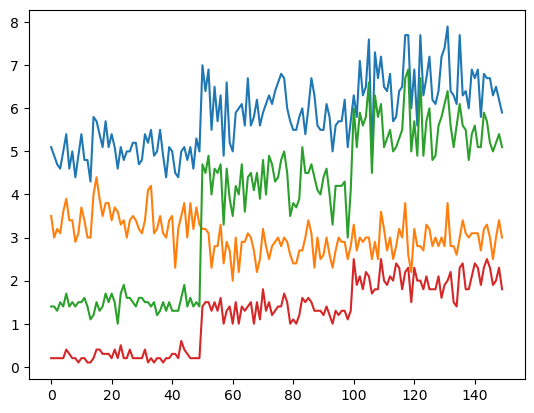

In [42]:
plt.plot(data)

<BarContainer object of 4 artists>

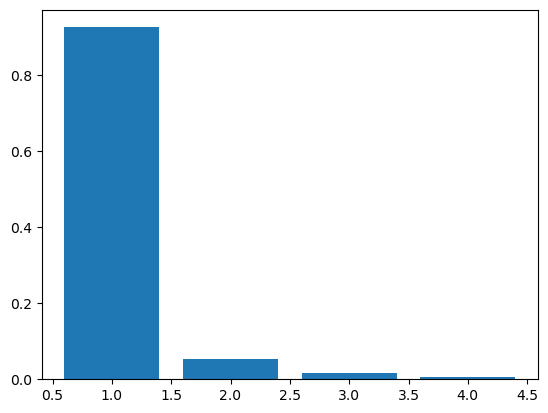

In [44]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

In [46]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

## Step--6:  Making the scree plot

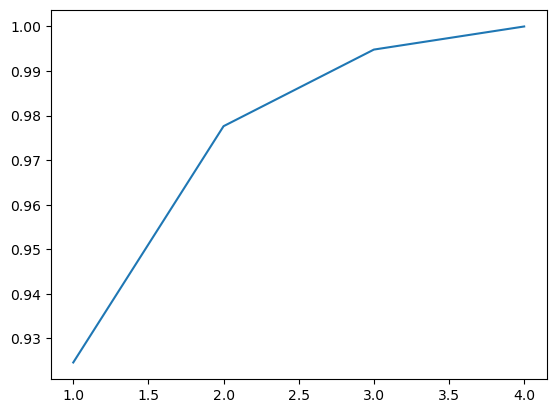

In [48]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

## Step--7: PCA with 2 component

In [56]:
pc2 = PCA(n_components=2, random_state=42)
ndata = pc2.fit_transform(data)

In [58]:
ndata.shape

(150, 2)

Making a dataframe out of it for convenience

In [63]:
df = pd.DataFrame(ndata, columns=["PC1","PC2"])
df.head()

,PC1,PC2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [67]:
df_final = pd.concat([df, y], axis=1)
df_final.head()

,PC1,PC2,iris
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


## Step--8 : Plotting the data 

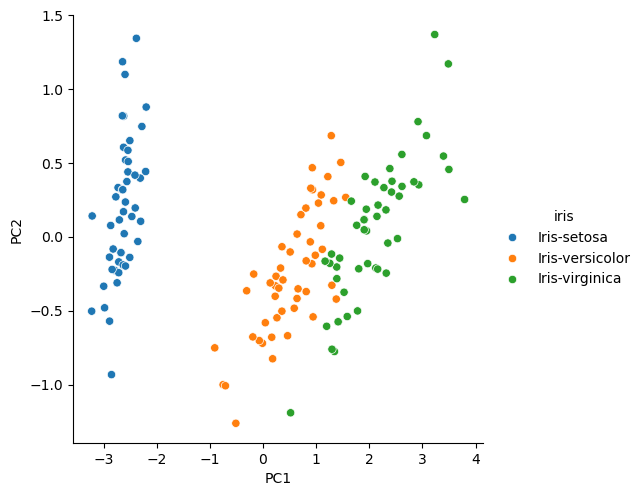

In [74]:
import warnings 
warnings.filterwarnings('ignore')

import seaborn as sns 
sns.pairplot(data=df_final, x_vars=["PC1"], y_vars=["PC2"], hue="iris", size=5)